# Imports

# EDA (Exploratory Data Analysis) of the dataset

In this notebook, explore the Abalone dataset, by showing relevant visualizations that help understand the problem you are modelling.

Please make sure to write down your conclusions in the final notebook and to remove these intructions.

In [5]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

pd.set_option("display.max_columns", 500)
plt.style.use("seaborn-v0_8")
sns.set_palette("husl")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data

In [6]:
df = pd.read_csv("../abalone.csv")

print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset shape: (4177, 9)

First 5 rows:


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# EDA

In [7]:
# 1. Basic Dataset Information
print("=" * 50)
print("BASIC DATASET INFORMATION")
print("=" * 50)

print("\nDataset Info:")
print(f"Shape: {df.shape} (Rows: {df.shape[0]}, Columns: {df.shape[1]})")

print("\nColumn Names and Data Types:")
print(df.dtypes)

print("\nMissing Values:")
missing_values = df.isnull().sum()
print(
    missing_values[missing_values > 0]
    if missing_values.sum() > 0
    else "No missing values found!"
)

print("\nBasic Statistics:")
df.describe()

BASIC DATASET INFORMATION

Dataset Info:
Shape: (4177, 9) (Rows: 4177, Columns: 9)

Column Names and Data Types:
Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

Missing Values:
No missing values found!

Basic Statistics:


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


TARGET VARIABLE ANALYSIS - RINGS


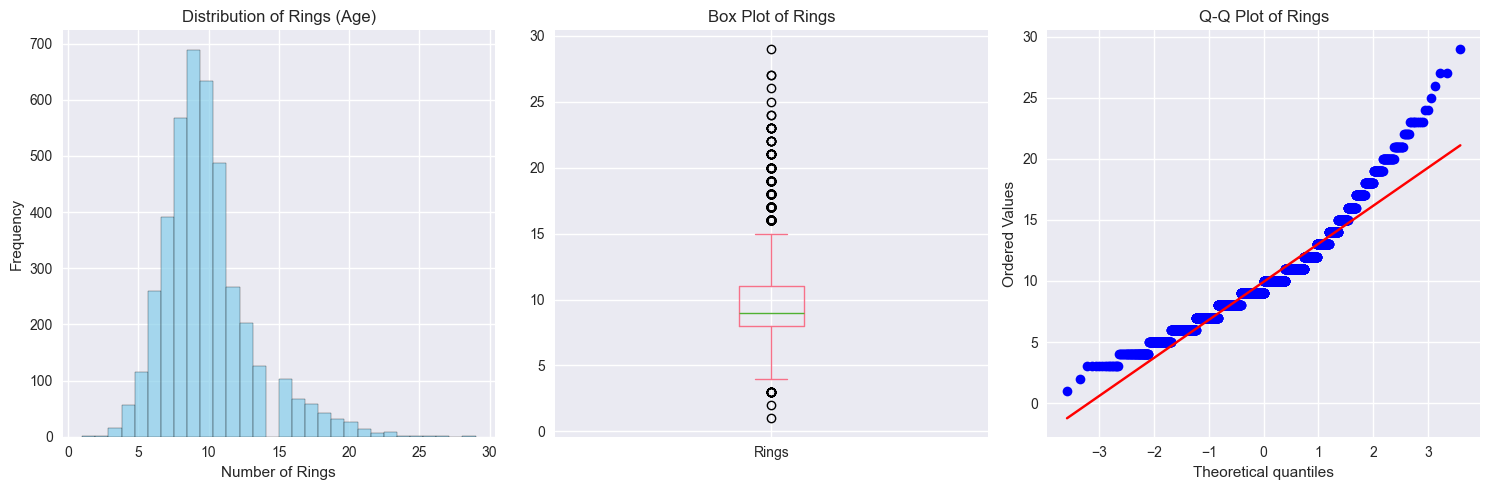

Rings Statistics:
Min: 1
Max: 29
Mean: 9.93
Median: 9.0
Standard Deviation: 3.22


In [8]:
# 2. Target Variable Analysis - Rings (age indicator)
print("=" * 50)
print("TARGET VARIABLE ANALYSIS - RINGS")
print("=" * 50)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df["Rings"], bins=30, alpha=0.7, color="skyblue", edgecolor="black")
plt.title("Distribution of Rings (Age)")
plt.xlabel("Number of Rings")
plt.ylabel("Frequency")

plt.subplot(1, 3, 2)
df["Rings"].plot(kind="box")
plt.title("Box Plot of Rings")

plt.subplot(1, 3, 3)
stats.probplot(df["Rings"], dist="norm", plot=plt)
plt.title("Q-Q Plot of Rings")

plt.tight_layout()
plt.show()

print("Rings Statistics:")
print(f"Min: {df['Rings'].min()}")
print(f"Max: {df['Rings'].max()}")
print(f"Mean: {df['Rings'].mean():.2f}")
print(f"Median: {df['Rings'].median()}")
print(f"Standard Deviation: {df['Rings'].std():.2f}")

CATEGORICAL VARIABLE ANALYSIS - SEX


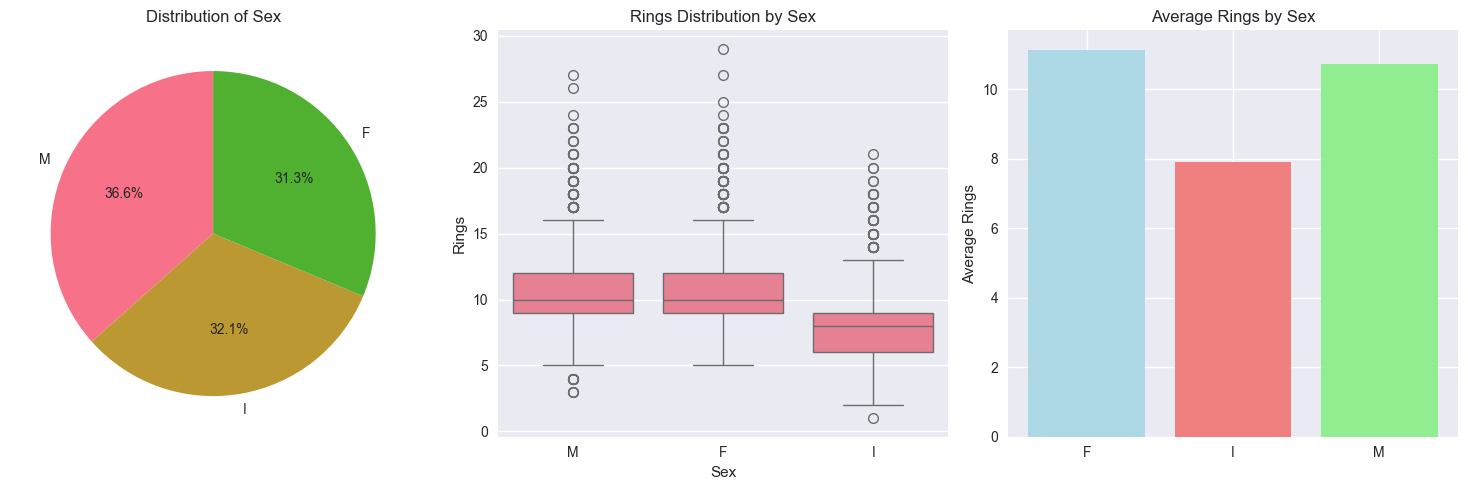

Sex Distribution:
Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64

Average Rings by Sex:
Sex
F    11.129304
I     7.890462
M    10.705497
Name: Rings, dtype: float64


In [9]:
# 3. Categorical Variable Analysis - Sex
print("=" * 50)
print("CATEGORICAL VARIABLE ANALYSIS - SEX")
print("=" * 50)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sex_counts = df["Sex"].value_counts()
plt.pie(sex_counts.values, labels=sex_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Sex")

plt.subplot(1, 3, 2)
sns.boxplot(x="Sex", y="Rings", data=df)
plt.title("Rings Distribution by Sex")

plt.subplot(1, 3, 3)
sex_ring_means = df.groupby("Sex")["Rings"].mean()
plt.bar(
    sex_ring_means.index,
    sex_ring_means.values,
    color=["lightblue", "lightcoral", "lightgreen"],
)
plt.title("Average Rings by Sex")
plt.ylabel("Average Rings")

plt.tight_layout()
plt.show()

print("Sex Distribution:")
print(sex_counts)
print("\nAverage Rings by Sex:")
print(sex_ring_means)

NUMERICAL VARIABLES ANALYSIS
Numerical columns: ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']


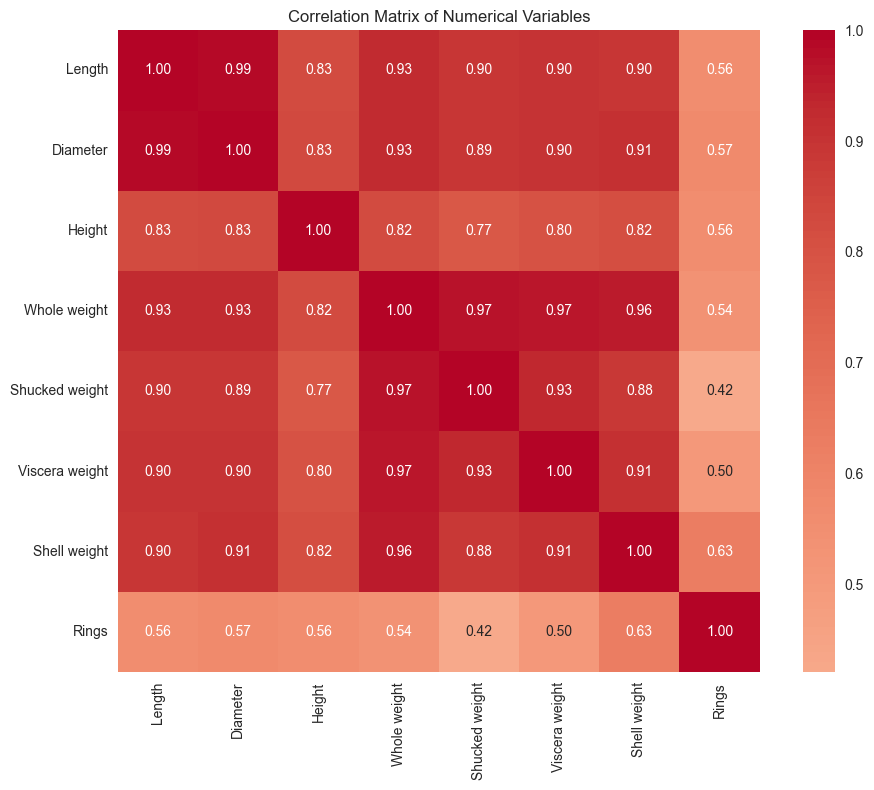


Correlation with Rings (target variable):
Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Name: Rings, dtype: float64


In [10]:
# 4. Numerical Variables Analysis
print("=" * 50)
print("NUMERICAL VARIABLES ANALYSIS")
print("=" * 50)

# Select only numerical columns (excluding Sex)
numerical_cols = df.select_dtypes(include=[np.number]).columns

print("Numerical columns:", list(numerical_cols))

# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(
    correlation_matrix, annot=True, cmap="coolwarm", center=0, square=True, fmt=".2f"
)
plt.title("Correlation Matrix of Numerical Variables")
plt.tight_layout()
plt.show()

# Correlation with target variable (Rings)
print("\nCorrelation with Rings (target variable):")
ring_correlations = correlation_matrix["Rings"].sort_values(ascending=False)
print(ring_correlations)

DISTRIBUTION OF NUMERICAL FEATURES


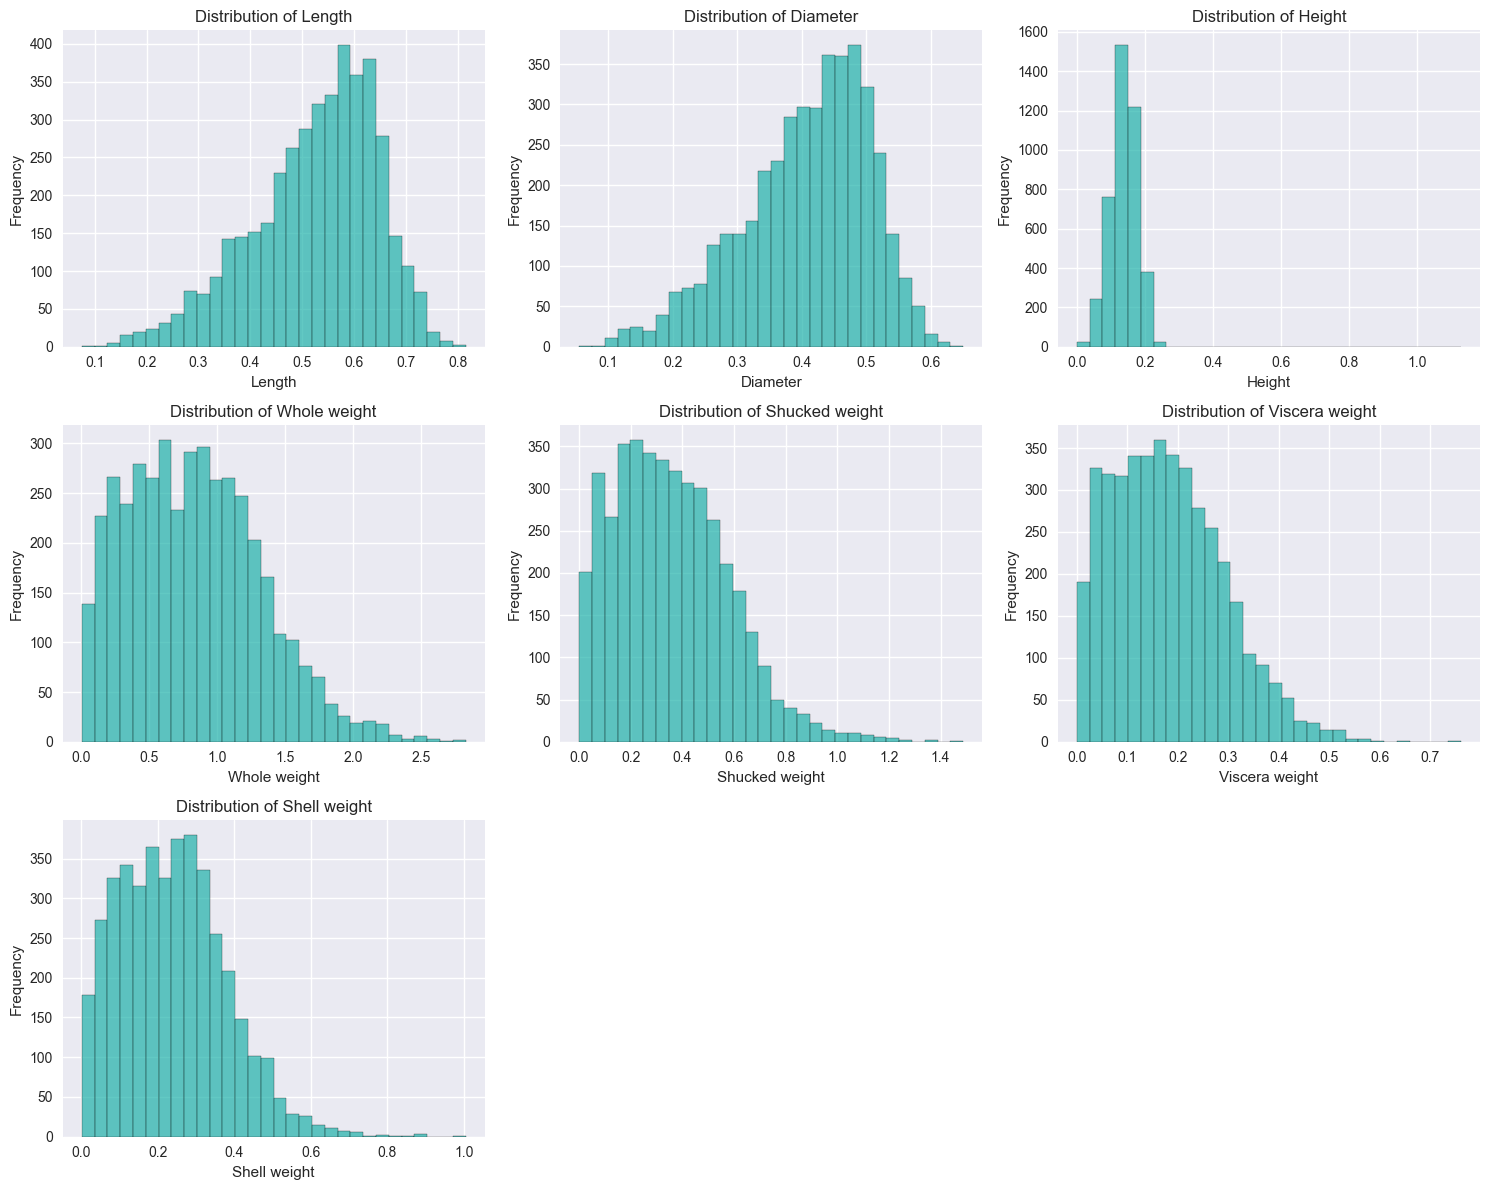

In [11]:
# 5. Distribution of Numerical Features
print("=" * 50)
print("DISTRIBUTION OF NUMERICAL FEATURES")
print("=" * 50)

# Plot distributions of all numerical features
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    if col != "Rings":
        axes[i].hist(
            df[col], bins=30, alpha=0.7, color="lightseagreen", edgecolor="black"
        )
        axes[i].set_title(f"Distribution of {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frequency")

# Hide empty subplots
for i in range(len(numerical_cols) - 1, 9):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

RELATIONSHIP BETWEEN FEATURES AND TARGET (RINGS)


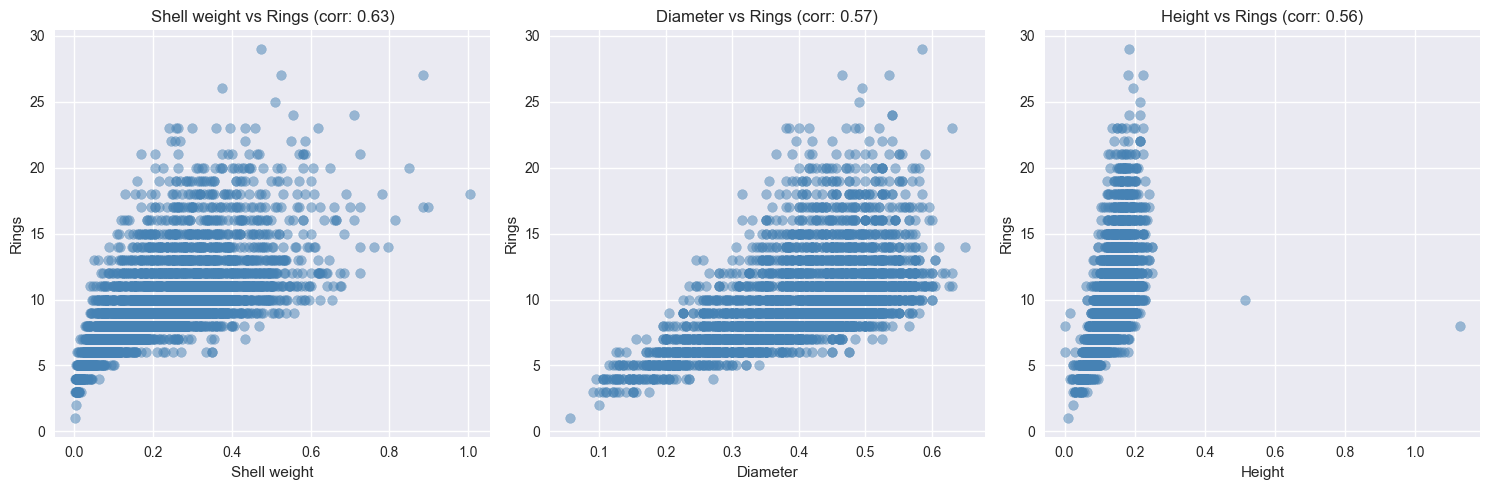

In [12]:
# 6. Relationship between Features and Target
print("=" * 50)
print("RELATIONSHIP BETWEEN FEATURES AND TARGET (RINGS)")
print("=" * 50)

# Scatter plots of top correlated features with Rings
top_correlated = ring_correlations.index[1:4]  # Top 3 features correlated with Rings

plt.figure(figsize=(15, 5))

for i, feature in enumerate(top_correlated, 1):
    plt.subplot(1, 3, i)
    plt.scatter(df[feature], df["Rings"], alpha=0.5, color="steelblue")
    plt.xlabel(feature)
    plt.ylabel("Rings")
    plt.title(f"{feature} vs Rings (corr: {ring_correlations[feature]:.2f})")

plt.tight_layout()
plt.show()

MULTIVARIATE ANALYSIS


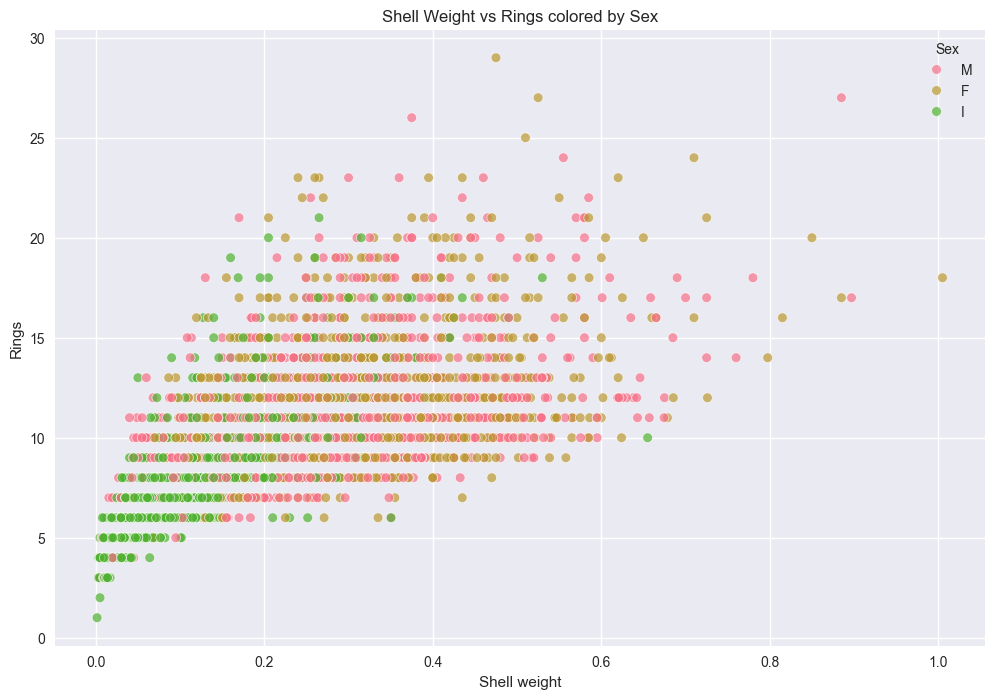

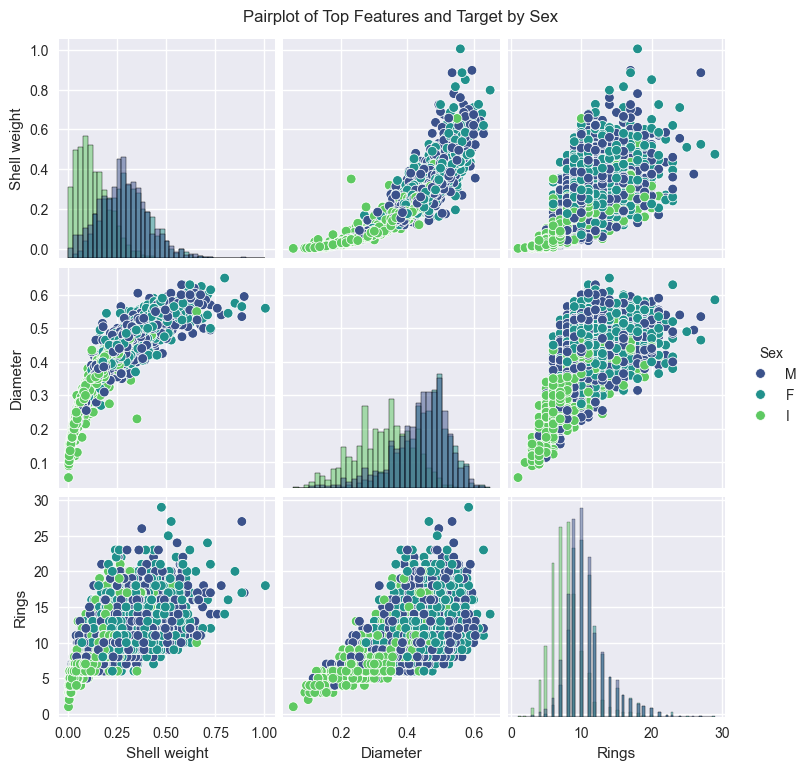

In [13]:
# 7. Multivariate Analysis
print("=" * 50)
print("MULTIVARIATE ANALYSIS")
print("=" * 50)

plt.figure(figsize=(12, 8))
sns.scatterplot(x="Shell weight", y="Rings", hue="Sex", data=df, alpha=0.7)
plt.title("Shell Weight vs Rings colored by Sex")
plt.show()

# Pairplot of top features
top_features = list(top_correlated[:2]) + ["Rings"]
sns.pairplot(df[top_features + ["Sex"]], hue="Sex", diag_kind="hist", palette="viridis")
plt.suptitle("Pairplot of Top Features and Target by Sex", y=1.02)
plt.show()

OUTLIER DETECTION


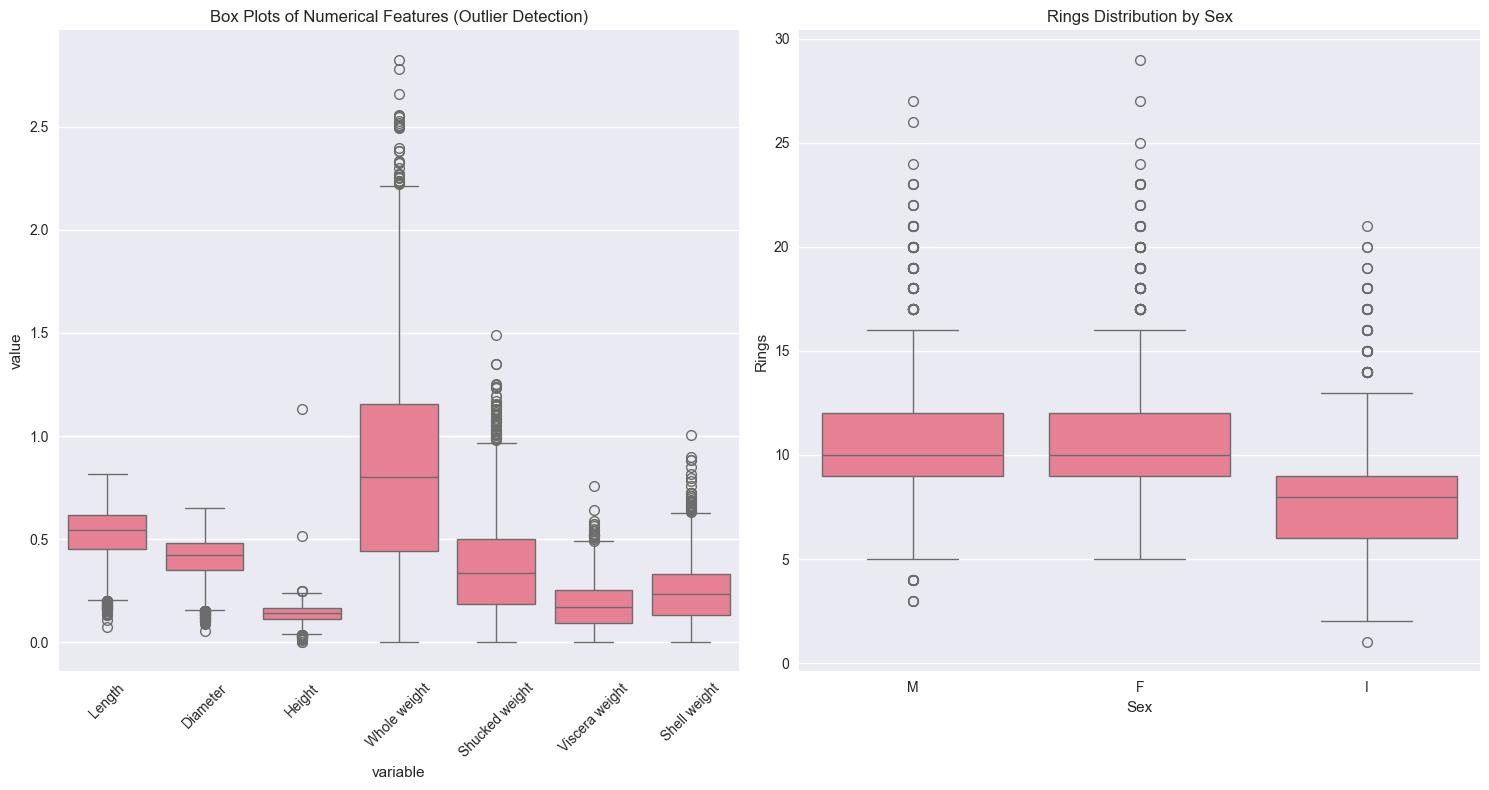

In [ ]:
# 8. Outlier Detection
print("=" * 50)
print("OUTLIER DETECTION")
print("=" * 50)

plt.figure(figsize=(15, 8))
numerical_for_boxplot = [col for col in numerical_cols if col != "Rings"]

df_melted = pd.melt(df[numerical_for_boxplot])
plt.subplot(1, 2, 1)
sns.boxplot(x="variable", y="value", data=df_melted)
plt.xticks(rotation=45)
plt.title("Box Plots of Numerical Features")

plt.subplot(1, 2, 2)
sns.boxplot(x="Sex", y="Rings", data=df)
plt.title("Rings Distribution by Sex")

plt.tight_layout()
plt.show()